In [1]:
%matplotlib inline
import matplotlib.pyplot as plot
plot.style.use('seaborn-white')
import numpy as np

# 1. Subplots by hand - `axes`

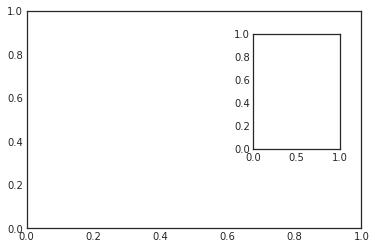

In [2]:
ax1 = plot.axes()
ax2 = plot.axes([0.65, 0.40, 0.2, 0.4])

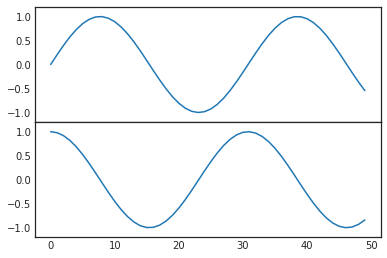

In [3]:
# Equivalent in OO interface
fig = plot.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2)) # No x-labels in the top axes
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

# 2.  Simple Grids of Subplots - `subplot` 

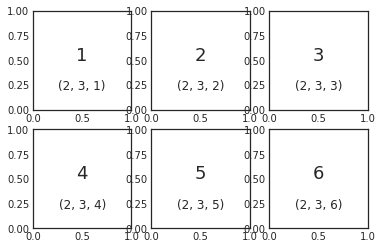

In [4]:
for i in range(1,7):
    plot.subplot(2, 3, i) # plot will take index position on a grid with nrows and ncols
    plot.text(0.5, 0.5, str(i), fontsize=18, ha='center')
    plot.text(0.5, 0.2, str((2,3,i)), fontsize=12, ha='center')

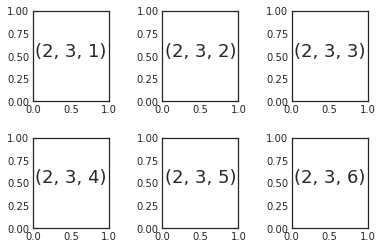

In [5]:
# Equivalent OO command (with adjusting spacing between plots)
fig = plot.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.7) # hspace - along the height, wspace - along the width
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2,3,i)), fontsize=18, ha='center')

# 3. The Whole Grid in One Go - `subplots`

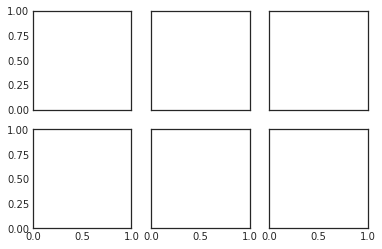

In [6]:
fig, ax = plot.subplots(2, 3, sharex='col', sharey='row') # all axes in the same row share their y-axis scale, 
# and all axes in the same column share their x-axis scale

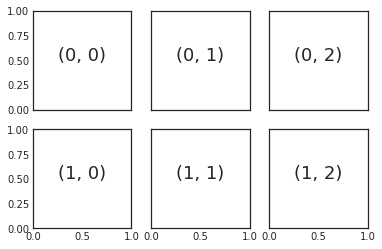

In [7]:
# Axes are in a two-dimensional array, indexed by [row, col]
for r in range(2):
    for c in range(3):
        ax[r, c].text(0.5, 0.5, str((r,c)), fontsize=18, ha='center')
fig

# 4. More Complicated Arrangements - `GridSpec`

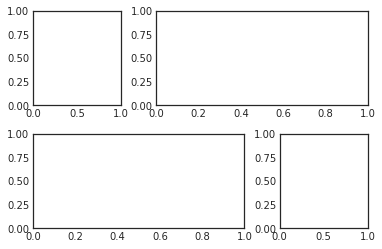

In [8]:
# Does not create a plot by itself, but is recognized by `subplot` command
grid = plot.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plot.subplot(grid[0, 0])
plot.subplot(grid[0, 1:])
plot.subplot(grid[1, :2])
plot.subplot(grid[1, 2])

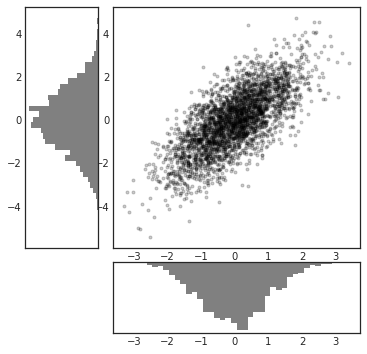

In [40]:
# Multi-axis histogram plots
# Create some normally distributed data
import numpy as np
mean = [0, 0]
cov = [[1, 1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plot.figure(figsize=(6,6))
grid = plot.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1:, 1:], yticklabels=[], sharex=main_ax)

# Scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray');
x_hist.invert_yaxis();

y_hist.hist(y, 40, histtype='stepfilled', orientation='horizontal', color='gray');
y_hist.invert_xaxis();